In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
! pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

In [4]:
import yfinance as yf

xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d")

# btc = yf.Ticker("BTC-USD")
# df_btc = yf.download(tickers="BTC-USD", period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308
2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609


In [6]:
df_xmr.shift(-1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,121.344002,121.665001,101.757004,105.585999,105.585999,84614000.0
2017-11-10,105.750000,127.106003,103.877998,119.615997,119.615997,107708000.0
2017-11-11,119.597000,133.675003,110.617996,123.856003,123.856003,144948000.0
2017-11-12,128.960007,136.528000,120.921997,123.402000,123.402000,116200000.0
2017-11-13,123.615997,124.200996,118.625999,122.352997,122.352997,53544800.0
...,...,...,...,...,...,...
2023-10-15,152.437531,153.522949,151.155411,152.544098,152.544098,64382308.0
2023-10-16,152.532791,152.532791,149.571411,150.522949,150.522949,59794609.0
2023-10-17,150.519150,152.444458,149.800720,149.800720,149.800720,49751092.0


# Make Label


In [7]:
df_xmr["Close_difference"] = df_xmr["Close"].shift(-1) - df_xmr["Close"]
df = df_xmr.copy()

##### method1


In [8]:
df["Label"] = (df["Close_difference"] > 0).astype(int)
df.drop("Close_difference", axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0
2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,0


##### method2


In [10]:
df = df.reset_index(drop=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0
2168,2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,0
2169,2023-10-18,150.519150,152.444458,149.800720,149.800720,149.800720,49751092,1


### Change Features


In [11]:
df["Variance"] = df["High"] - df["Low"]
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Variance
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0,11.185997
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1,19.907997
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1,23.228004
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0,23.057007
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0,15.606003
...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1,1.292755
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0,2.367538
2168,2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,0,2.961380
2169,2023-10-18,150.519150,152.444458,149.800720,149.800720,149.800720,49751092,1,2.643738


In [12]:
df.drop(columns=["Open", "High", "Low", "Adj Close"], inplace=True)
df

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755
2167,2023-10-16,152.544098,64382308,0,2.367538
2168,2023-10-17,150.522949,59794609,0,2.961380
2169,2023-10-18,149.800720,49751092,1,2.643738


# Divide Our Data


In [14]:
def train_test_split_by_date(
    df: pd.DataFrame,
    start_date_train: str,
    end_date_train: str,
    start_date_test: str,
    end_date_test: str,
    divide_X_y: bool = True,
    test: bool = True,
):
    df_train = df[
        (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
    ].reset_index(drop=True)

    df_test = df[
        (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
    ].reset_index(drop=True)

    if divide_X_y:
        X_train = df_train.drop(columns=["Label"])
        y_train = df_train["Label"]
        if test:
            X_test = df_test.drop(columns=["Label"])
            y_test = df_test["Label"]
            return X_train, X_test, y_train, y_test
        return X_train, y_train

    return df_train, df_test

In [15]:
start_date_train_test = "2017-11-09"
end_date_train_test = "2023-10-07"

df_train_test = df[
    (df["Date"] >= start_date_train_test) & (df["Date"] <= end_date_train_test)
].reset_index(drop=True)
df_train_test

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2154,2023-10-03,147.151352,49389643,1,2.639694
2155,2023-10-04,150.469055,59400400,0,4.761566
2156,2023-10-05,149.623718,55704972,1,2.762878
2157,2023-10-06,151.992264,49535004,1,4.027649


# Divide Test Data


In [16]:
start_date_train_val = "2017-11-09"
end_date_train_val = "2023-09-07"

start_date_test = "2023-09-08"
end_date_test = "2023-10-07"

df_train_val, df_test = train_test_split_by_date(
    df,
    start_date_train_val,
    end_date_train_val,
    start_date_test,
    end_date_test,
    divide_X_y=False,
)
df_test

,Date,Close,Volume,Label,Variance
0,2023-09-08,143.886154,46927009,0,3.195389
1,2023-09-09,143.406815,35896666,0,1.677582
2,2023-09-10,142.894440,33705148,0,1.965088
3,2023-09-11,139.930466,58031716,1,5.441772
4,2023-09-12,140.804672,57433672,1,3.567017
5,2023-09-13,143.115967,54374646,1,4.085739
6,2023-09-14,146.329483,44084896,1,4.750565
7,2023-09-15,147.350723,57280169,0,2.792572
8,2023-09-16,144.624649,34872985,1,3.754654
9,2023-09-17,145.797852,31255846,0,2.700851


# Feature Engineering


### Check Missing Values


In [20]:
df_train_val.isna().sum()

Date        0
Close       0
Volume      0
Label       0
Variance    0
dtype: int64

### Outlier


##### drop ountliers, Z-Score method


In [21]:
def drop_outliers_zScore(data, threshold=3):
    z_scores = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
    print((np.abs(z_scores) < threshold).all(axis=1).sum())
    filtered_data = data[(np.abs(z_scores) < threshold).all(axis=1)]
    return filtered_data

In [22]:
# drop_outliers_zScore(df_train_val)

##### drop outliers with LocalOutlierFactor


In [23]:
from sklearn.neighbors import LocalOutlierFactor


def drop_outliers_LOF(data: pd.DataFrame):
    clf = LocalOutlierFactor(n_neighbors=10, contamination=0.05)  # 0.03, 0.05

    # Fit the data to the model
    y_pred = clf.fit_predict(data.iloc[:, :-1])

    # Identify the outliers
    outliers = np.where(y_pred == -1)

    return data.drop(outliers[0])

In [24]:
# df_train_val.reset_index(drop=False)

In [25]:
df_train_val.reset_index(drop=False).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     2129 non-null   int64         
 1   Date      2129 non-null   datetime64[ns]
 2   Close     2129 non-null   float64       
 3   Volume    2129 non-null   int64         
 4   Label     2129 non-null   int64         
 5   Variance  2129 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 99.9 KB


In [26]:
drop_outliers_LOF(df_train_val.reset_index(drop=False).drop("Date", axis=1))

,index,Close,Volume,Label,Variance
0,0,120.779999,86864600,0,11.185997
1,1,105.585999,84614000,1,19.907997
2,2,119.615997,107708000,1,23.228004
3,3,123.856003,144948000,0,23.057007
4,4,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2124,2124,140.839981,49564266,1,2.094498
2125,2125,141.170868,63835398,0,2.993912
2126,2126,137.781372,54468002,1,3.625900
2127,2127,142.113235,67734044,1,5.009445


### Split Train and Validation Data


In [28]:
start_date_train = "2017-11-09"
end_date_train = "2023-06-07"

start_date_val = "2023-06-08"
end_date_val = "2023-09-07"

X_train, X_validation, y_train, y_validation = train_test_split_by_date(
    df_train_val,
    start_date_train,
    end_date_train,
    start_date_val,
    end_date_val,
    divide_X_y=True,
)

In [29]:
X_train.head()

,Date,Close,Volume,Variance
0,2017-11-09,120.779999,86864600,11.185997
1,2017-11-10,105.585999,84614000,19.907997
2,2017-11-11,119.615997,107708000,23.228004
3,2017-11-12,123.856003,144948000,23.057007
4,2017-11-13,123.402000,116200000,15.606003


In [30]:
X_validation.head()

,Date,Close,Volume,Variance
0,2023-06-08,142.660126,56664638,3.377151
1,2023-06-09,143.050003,52539231,2.429214
2,2023-06-10,137.812439,92419685,15.922714
3,2023-06-11,138.158829,39307804,3.207825
4,2023-06-12,140.197021,77701627,4.929169


In [31]:
f1_score(y_validation, y_validation.shift(1).fillna(0))

0.5333333333333333

In [32]:
f1_score(y_validation, y_validation.shift(1).fillna(1))

0.5471698113207547

### Plot Distributions


In [34]:
X_train.describe()

,Close,Volume,Variance
count,2037.000000,2.037000e+03,2037.000000
mean,149.895335,2.542309e+08,11.652186
std,83.999876,1.028817e+09,14.563935
min,33.010323,1.016030e+07,0.610867
25%,79.704430,6.595855e+07,3.583393
50%,142.323288,1.066830e+08,7.223503
75%,198.738998,1.967663e+08,13.692032
max,483.583618,2.895912e+10,191.717880


### Normalizing


##### method 1 : Standard Scaler


In [35]:
X_train_normalized_ss = X_train.copy()
X_validation_normalized_ss = X_validation.copy()

scaler_ss = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ss[cols] = scaler_ss.fit_transform(X_train_normalized_ss[cols])
X_validation_normalized_ss[cols] = scaler_ss.transform(X_validation_normalized_ss[cols])

In [36]:
X_train_normalized_ss.describe()

,Close,Volume,Variance
count,2037.000000,2037.000000,2.037000e+03
mean,0.000000,0.000000,-2.790546e-17
std,1.000246,1.000246,1.000246e+00
min,-1.391832,-0.237293,-7.583136e-01
25%,-0.835812,-0.183044,-5.541616e-01
50%,-0.090166,-0.143450,-3.041603e-01
75%,0.581616,-0.055869,1.400959e-01
max,3.973461,27.907736,1.236684e+01


##### method 2 : Power Transform


In [38]:
X_train_transformed = X_train.copy()
X_validation_transformed = X_validation.copy()

power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

cols = X_train.drop(columns=["Date"]).columns

X_train_transformed[cols] = power_transformer.fit_transform(X_train_transformed[cols])
X_validation_transformed[cols] = power_transformer.transform(
    X_validation_transformed[cols]
)

In [39]:
X_train_transformed.describe()

,Close,Volume,Variance
count,2.037000e+03,2.037000e+03,2.037000e+03
mean,-1.116218e-16,-1.088313e-14,3.069600e-16
std,1.000246e+00,1.000246e+00,1.000246e+00
min,-2.211691e+00,-2.819797e+00,-2.491462e+00
25%,-8.342388e-01,-5.256164e-01,-7.677758e-01
50%,1.540727e-01,-3.308889e-02,2.600074e-02
75%,7.534815e-01,5.444954e-01,7.129205e-01
max,2.462102e+00,3.705187e+00,2.844513e+00


##### method 3 : Min Max Scaler


In [41]:
X_train_normalized_ms = X_train.copy()
X_validation_normalized_ms = X_validation.copy()

scaler_min_max = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ms[cols] = scaler_min_max.fit_transform(X_train_normalized_ms[cols])
X_validation_normalized_ms[cols] = scaler_min_max.transform(
    X_validation_normalized_ms[cols]
)

In [42]:
X_train_normalized_ms.describe()

,Close,Volume,Variance
count,2037.000000,2037.000000,2.037000e+03
mean,0.000000,0.000000,-2.790546e-17
std,1.000246,1.000246,1.000246e+00
min,-1.391832,-0.237293,-7.583136e-01
25%,-0.835812,-0.183044,-5.541616e-01
50%,-0.090166,-0.143450,-3.041603e-01
75%,0.581616,-0.055869,1.400959e-01
max,3.973461,27.907736,1.236684e+01


In [44]:
df_train_val.corr()

,Close,Volume,Label,Variance
Close,1.000000,0.049219,-0.015416,0.671699
Volume,0.049219,1.000000,0.012916,0.083045
Label,-0.015416,0.012916,1.000000,-0.008214
Variance,0.671699,0.083045,-0.008214,1.000000


# Modeling and Evaluating


In [45]:
def normalization(X_train, X_test, method):
    X_train_normalized = X_train.copy()
    X_test_normalized = X_test.copy()

    if method == "StandardScaler":
        ss = StandardScaler()
        X_train_normalized[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ss.transform(X_test[X_test.columns])

    if method == "MinMaxScaler":
        ms = MinMaxScaler()
        X_train_normalized[X_train.columns] = ms.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ms.transform(X_test[X_test.columns])

    if method == "PowerTransformer":
        pt = PowerTransformer()
        X_train_normalized[X_train.columns] = pt.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = pt.transform(X_test[X_test.columns])

    return X_train_normalized, X_test_normalized

In [46]:
def evaluation(y_true, y_pred, df_evaluation, df_confusion, model_name):
    # Evaluate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    new_record_evaluation = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score,
        "MSE": mse,
    }

    df_evaluation.loc[model_name] = new_record_evaluation

    # Confusion matrix

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # tp = np.sum((y_true == 1) & (y_pred == 1))
    # tn = np.sum((y_true == 0) & (y_pred == 0))
    # fp = np.sum((y_true == 0) & (y_pred == 1))
    # fn = np.sum((y_true == 1) & (y_pred == 0))

    new_record_confusion = {
        "tp": confusion[1, 1],
        "tn": confusion[0, 0],
        "fp": confusion[0, 1],
        "fn": confusion[1, 0],
    }

    df_confusion.loc[model_name] = new_record_confusion

    print(confusion)
    print(new_record_evaluation)

    return df_evaluation, df_confusion

In [47]:
def model_predict(
    df_train_val,
    model,
    test_item,
    normalize=False,
    start_date_train="2017-11-09",
    start_date_val="2023-08-08",
    end_date_val="2023-09-07",
):
    from datetime import date, timedelta

    test_item_date = test_item.Date.date()

    end_date_train = (test_item_date - timedelta(days=1)).strftime("%Y-%m-%d")

    X_train, y_train = train_test_split_by_date(
        df_train_val,
        start_date_train,
        end_date_train,
        start_date_val,
        end_date_val,
        divide_X_y=True,
        test=False,
    )

    X_train = X_train.drop("Date", axis=1)
    X_test = (test_item[1:].to_frame().T).astype(float)

    # Normalized
    # if normalize:
    X_train, X_test = normalization(X_train, X_test, method="PowerTransformer")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    return y_pred

### Define Evaluation Matrixes


In [48]:
df_confusion_val = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_val = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

### Logistic Regression


In [49]:
def logestic_regression(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.linear_model import LogisticRegression

    model_lr = LogisticRegression(C=1, penalty="l2")
    model_name = "Logistic Regression"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_lr
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [50]:
y_pred_lr = logestic_regression(
    df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


### AdaBoost


In [55]:
def ada_boost(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.ensemble import AdaBoostClassifier

    model_ada = AdaBoostClassifier(random_state=42)
    model_name = "Ada Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_ada
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [56]:
y_pred_ab = ada_boost(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[12 27]
 [10 43]]
{'Accuracy': 0.5978260869565217, 'Precision': 0.6142857142857143, 'Recall': 0.8113207547169812, 'F1 Score': 0.6991869918699187, 'AUC': 0.5595065312046444, 'MSE': 0.40217391304347827}


# Add Extra Features

In [88]:
btc = yf.Ticker("BTC-USD")
df_btc = yf.download(tickers = "BTC-USD", period = "max", interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [89]:
df_btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-10-15,26858.011719,27289.169922,26817.894531,27159.652344,27159.652344,7098201980
2023-10-16,27162.628906,29448.138672,27130.472656,28519.466797,28519.466797,27833876539
2023-10-17,28522.097656,28618.751953,28110.185547,28415.748047,28415.748047,14872527508


In [90]:
df

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755
2167,2023-10-16,152.544098,64382308,0,2.367538
2168,2023-10-17,150.522949,59794609,0,2.961380
2169,2023-10-18,149.800720,49751092,1,2.643738


In [91]:
data = df.copy()
data

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755
2167,2023-10-16,152.544098,64382308,0,2.367538
2168,2023-10-17,150.522949,59794609,0,2.961380
2169,2023-10-18,149.800720,49751092,1,2.643738


In [92]:
# Calculate the exponential moving average
data['EMA5'] = data['Close'].ewm(span=5).mean()
data

,Date,Close,Volume,Label,Variance,EMA5
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948
...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813


In [93]:
# Calculate the simple moving average
data['SMA5'] = data['Close'].rolling(5).mean()
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,NaN
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,NaN
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,NaN
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,NaN
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000
...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984


In [94]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', add_indicator=False)
##X = imputer.fit_transform(X)
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)
data['SMA5'] = imputer.fit_transform(data[['SMA5']])
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000
...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984


In [95]:
data = data.merge(df_btc[["Close"]], on="Date", how="left").rename(columns={"Close_x": "Close", "Close_y": "Close_BTC"})
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234
...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797


In [96]:
data = data.dropna(axis=0)
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234
...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797


In [97]:
data['EMA5_BTC'] = data['Close_BTC'].ewm(span=5).mean()
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363
...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152


In [98]:
# Calculate the simple moving average
data['SMA5_BTC'] = data['Close_BTC'].rolling(5).mean()
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,NaN
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,NaN
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,NaN
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,NaN
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074
...,...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932,26902.770703
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220,27232.000000
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829,27563.789844
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152,27856.983203


In [99]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', add_indicator=False)
##X = imputer.fit_transform(X)
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)
data['SMA5_BTC'] = imputer.fit_transform(data[['SMA5_BTC']])
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,20968.581554
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,20968.581554
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,20968.581554
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,20968.581554
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074
...,...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932,26902.770703
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220,27232.000000
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829,27563.789844
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152,27856.983203


In [100]:
# Download the S&P 500 data
df_sp500 = yf.download(tickers = "^GSPC", period = "max", interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [101]:
df_sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2023-10-13,4360.490234,4377.100098,4311.970215,4327.779785,4327.779785,0
2023-10-16,4342.370117,4383.330078,4342.370117,4373.629883,4373.629883,3409960000
2023-10-17,4345.229980,4393.569824,4337.540039,4373.200195,4373.200195,3794850000


In [102]:
data = data.merge(df_sp500[["Close"]], on="Date", how="left").rename(columns={"Close_x": "Close", "Close_y": "Close_SP500"})
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,20968.581554,2584.620117
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,20968.581554,2582.300049
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,20968.581554,NaN
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,20968.581554,NaN
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074,2584.840088
...,...,...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932,26902.770703,NaN
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220,27232.000000,4373.629883
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829,27563.789844,4373.200195
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152,27856.983203,4314.600098


In [103]:
data.isna().sum()/len(data)*100

Date            0.000000
Close           0.000000
Volume          0.000000
Label           0.000000
Variance        0.000000
EMA5            0.000000
SMA5            0.000000
Close_BTC       0.000000
EMA5_BTC        0.000000
SMA5_BTC        0.000000
Close_SP500    31.137725
dtype: float64

In [104]:
data.corr()

,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500
Close,1.000000,0.049304,-0.015510,0.669792,0.994390,0.991397,0.670358,0.670841,0.670353,0.451793
Volume,0.049304,1.000000,0.012765,0.084935,0.045305,0.044806,0.087077,0.085597,0.085527,0.057612
Label,-0.015510,0.012765,1.000000,-0.007935,-0.008890,-0.007843,0.015843,0.018164,0.018455,0.045600
Variance,0.669792,0.084935,-0.007935,1.000000,0.691073,0.695087,0.295493,0.310055,0.313530,0.065231
EMA5,0.994390,0.045305,-0.008890,0.691073,1.000000,0.999250,0.668809,0.672627,0.672686,0.455267
SMA5,0.991397,0.044806,-0.007843,0.695087,0.999250,1.000000,0.666472,0.670962,0.672030,0.453626
Close_BTC,0.670358,0.087077,0.015843,0.295493,0.668809,0.666472,1.000000,0.998526,0.997066,0.849432
EMA5_BTC,0.670841,0.085597,0.018164,0.310055,0.672627,0.670962,0.998526,1.000000,0.999108,0.851428
SMA5_BTC,0.670353,0.085527,0.018455,0.313530,0.672686,0.672030,0.997066,0.999108,1.000000,0.849485
Close_SP500,0.451793,0.057612,0.045600,0.065231,0.455267,0.453626,0.849432,0.851428,0.849485,1.000000


In [105]:
data['Close_SP500'].mean()

3535.459492089517

In [106]:
data = data.sort_values(['Date'])
# Cloud Coverage - interpolate
data['Close_SP500'] = data.groupby('Date')['Close_SP500'].apply(lambda x: x.interpolate(method='linear'))

In [107]:
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,20968.581554,2584.620117
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,20968.581554,2582.300049
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,20968.581554,NaN
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,20968.581554,NaN
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074,2584.840088
...,...,...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932,26902.770703,NaN
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220,27232.000000,4373.629883
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829,27563.789844,4373.200195
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152,27856.983203,4314.600098


In [108]:
data.isna().sum()/len(data)*100

Date            0.000000
Close           0.000000
Volume          0.000000
Label           0.000000
Variance        0.000000
EMA5            0.000000
SMA5            0.000000
Close_BTC       0.000000
EMA5_BTC        0.000000
SMA5_BTC        0.000000
Close_SP500    31.137725
dtype: float64

In [109]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', add_indicator=False)
##X = imputer.fit_transform(X)
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)
data['Close_SP500'] = imputer.fit_transform(data[['Close_SP500']])

In [110]:
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,20968.581554,2584.620117
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,20968.581554,2582.300049
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,20968.581554,3535.459492
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,20968.581554,3535.459492
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074,2584.840088
...,...,...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932,26902.770703,3535.459492
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220,27232.000000,4373.629883
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829,27563.789844,4373.200195
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152,27856.983203,4314.600098


In [111]:
# Download the gold data
df_gold = yf.download(tickers = "GC=F", period = "max", interval = "1d")
df_gold

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-10-13,1877.500000,1930.099976,1877.500000,1927.400024,1927.400024,43
2023-10-16,1910.400024,1921.099976,1910.300049,1921.099976,1921.099976,53
2023-10-17,1914.300049,1925.800049,1914.300049,1922.699951,1922.699951,103


In [112]:
data = data.merge(df_gold[["Close"]], on="Date", how="left").rename(columns={"Close_x": "Close", "Close_y": "Close_gold"})
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500,Close_gold
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,20968.581554,2584.620117,1285.599976
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,20968.581554,2582.300049,1272.400024
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,20968.581554,3535.459492,NaN
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,20968.581554,3535.459492,NaN
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074,2584.840088,1277.300049
...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932,26902.770703,3535.459492,NaN
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220,27232.000000,4373.629883,1921.099976
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829,27563.789844,4373.200195,1922.699951
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152,27856.983203,4314.600098,1955.300049


In [113]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', add_indicator=False)
##X = imputer.fit_transform(X)
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)
data['Close_gold'] = imputer.fit_transform(data[['Close_gold']])
data

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500,Close_gold
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,20968.581554,2584.620117,1285.599976
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,20968.581554,2582.300049,1272.400024
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,20968.581554,3535.459492,1642.150066
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,20968.581554,3535.459492,1642.150066
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074,2584.840088,1277.300049
...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.448990,31895675,1,1.292755,152.852297,153.011316,27159.652344,27051.163932,26902.770703,3535.459492,1642.150066
2167,2023-10-16,152.544098,64382308,0,2.367538,152.749564,152.751715,28519.466797,27540.598220,27232.000000,4373.629883,1921.099976
2168,2023-10-17,150.522949,59794609,0,2.961380,152.007359,152.387943,28415.748047,27832.314829,27563.789844,4373.200195,1922.699951
2169,2023-10-18,149.800720,49751092,1,2.643738,151.271813,151.629984,28328.341797,27997.657152,27856.983203,4314.600098,1955.300049


In [114]:
data.corr()

,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500,Close_gold
Close,1.000000,0.049304,-0.015510,0.669792,0.994390,0.991397,0.670358,0.670841,0.670353,0.371957,0.183690
Volume,0.049304,1.000000,0.012765,0.084935,0.045305,0.044806,0.087077,0.085597,0.085527,0.044133,0.111608
Label,-0.015510,0.012765,1.000000,-0.007935,-0.008890,-0.007843,0.015843,0.018164,0.018455,0.037859,0.041236
Variance,0.669792,0.084935,-0.007935,1.000000,0.691073,0.695087,0.295493,0.310055,0.313530,0.057186,-0.030313
EMA5,0.994390,0.045305,-0.008890,0.691073,1.000000,0.999250,0.668809,0.672627,0.672686,0.376233,0.185356
SMA5,0.991397,0.044806,-0.007843,0.695087,0.999250,1.000000,0.666472,0.670962,0.672030,0.375416,0.184761
Close_BTC,0.670358,0.087077,0.015843,0.295493,0.668809,0.666472,1.000000,0.998526,0.997066,0.705865,0.519221
EMA5_BTC,0.670841,0.085597,0.018164,0.310055,0.672627,0.670962,0.998526,1.000000,0.999108,0.707991,0.519752
SMA5_BTC,0.670353,0.085527,0.018455,0.313530,0.672686,0.672030,0.997066,0.999108,1.000000,0.706616,0.518208
Close_SP500,0.371957,0.044133,0.037859,0.057186,0.376233,0.375416,0.705865,0.707991,0.706616,1.000000,0.821823


In [115]:
def train_test_split_by_date(
    df: pd.DataFrame,
    start_date_train: str,
    end_date_train: str,
    start_date_test: str,
    end_date_test: str,
    divide_X_y: bool = True,
    test: bool = True,
):
    data_train = data[
        (data["Date"] >= start_date_train) & (data["Date"] <= end_date_train)
    ].reset_index(drop=True)

    data_test = data[
        (data["Date"] >= start_date_test) & (data["Date"] <= end_date_test)
    ].reset_index(drop=True)

    if divide_X_y:
        X_train = data_train.drop(columns=["Label"])
        y_train = data_train["Label"]
        if test:
            X_test = data_test.drop(columns=["Label"])
            y_test = data_test["Label"]
            return X_train, X_test, y_train, y_test
        return X_train, y_train

    return data_train, data_test

In [116]:
start_date_train_test = "2017-11-09"
end_date_train_test = "2023-10-07"

data_train_test = data[
    (data["Date"] >= start_date_train_test) & (data["Date"] <= end_date_train_test)
].reset_index(drop=True)
data_train_test

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500,Close_gold
0,2017-11-09,120.779999,86864600,0,11.185997,120.779999,150.061194,7143.580078,7143.580078,20968.581554,2584.620117,1285.599976
1,2017-11-10,105.585999,84614000,1,19.907997,111.663599,150.061194,6618.140137,6828.316113,20968.581554,2582.300049,1272.400024
2,2017-11-11,119.615997,107708000,1,23.228004,115.430524,150.061194,6357.600098,6605.345369,20968.581554,3535.459492,1642.150066
3,2017-11-12,123.856003,144948000,0,23.057007,118.930338,150.061194,5950.069824,6333.153989,20968.581554,3535.459492,1642.150066
4,2017-11-13,123.402000,116200000,0,15.606003,120.646948,118.648000,6559.490234,6420.041363,6525.776074,2584.840088,1277.300049
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2023-10-03,147.151352,49389643,1,2.639694,146.933814,147.181586,27429.978516,27343.445870,27364.830078,4229.450195,1824.599976
2155,2023-10-04,150.469055,59400400,0,4.761566,148.112228,147.907901,27799.394531,27495.428757,27542.364844,4263.750000,1818.500000
2156,2023-10-05,149.623718,55704972,1,2.762878,148.616058,148.521793,27415.912109,27468.923208,27631.964062,4258.189941,1816.599976
2157,2023-10-06,151.992264,49535004,1,4.027649,149.741460,149.087964,27946.597656,27628.148024,27624.533594,4308.500000,1830.199951


In [117]:
start_date_train_val = "2017-11-09"
end_date_train_val = "2023-09-07"

start_date_test = "2023-09-08"
end_date_test = "2023-10-07"

data_train_val, data_test = train_test_split_by_date(
    data,
    start_date_train_val,
    end_date_train_val,
    start_date_test,
    end_date_test,
    divide_X_y=False,
)
data_test

,Date,Close,Volume,Label,Variance,EMA5,SMA5,Close_BTC,EMA5_BTC,SMA5_BTC,Close_SP500,Close_gold
0,2023-09-08,143.886154,46927009,0,3.195389,142.385781,141.640475,25905.654297,25964.006271,25898.296875,4457.490234,1918.400024
1,2023-09-09,143.406815,35896666,0,1.677582,142.726126,142.087665,25895.677734,25941.230092,25914.949219,3535.459492,1642.150066
2,2023-09-10,142.894440,33705148,0,1.965088,142.782230,143.110278,25832.226562,25904.895582,25925.398047,3535.459492,1642.150066
3,2023-09-11,139.930466,58031716,1,5.441772,141.831642,142.673724,25162.654297,25657.481820,25807.281641,4487.459961,1923.300049
4,2023-09-12,140.804672,57433672,1,3.567017,141.489319,142.184509,25833.343750,25716.102464,25725.911328,4461.899902,1911.300049
5,2023-09-13,143.115967,54374646,1,4.085739,142.031535,142.030472,26228.324219,25886.843049,25790.445312,4467.439941,1909.099976
6,2023-09-14,146.329483,44084896,1,4.750565,143.464184,142.615005,26539.673828,26104.453308,25919.244531,4505.100098,1910.000000
7,2023-09-15,147.350723,57280169,0,2.792572,144.759697,143.506262,26608.693359,26272.533325,26074.537891,4450.319824,1923.699951
8,2023-09-16,144.624649,34872985,1,3.754654,144.714681,144.445099,26568.281250,26371.115967,26355.663281,3535.459492,1642.150066
9,2023-09-17,145.797852,31255846,0,2.700851,145.075738,145.443735,26534.187500,26425.473145,26495.832031,3535.459492,1642.150066


In [118]:
data_train_val.isna().sum()

Date           0
Close          0
Volume         0
Label          0
Variance       0
EMA5           0
SMA5           0
Close_BTC      0
EMA5_BTC       0
SMA5_BTC       0
Close_SP500    0
Close_gold     0
dtype: int64

In [119]:
start_date_train = "2017-11-09"
end_date_train = "2023-06-07"

start_date_val = "2023-06-08"
end_date_val = "2023-09-07"

X_train, X_validation, y_train, y_validation = train_test_split_by_date(
    data_train_val,
    start_date_train,
    end_date_train,
    start_date_val,
    end_date_val,
    divide_X_y=True,
)

In [120]:
def evaluation(y_true, y_pred, data_evaluation, data_confusion, model_name):
    # Evaluate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    new_record_evaluation = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score,
        "MSE": mse,
    }

    data_evaluation.loc[model_name] = new_record_evaluation

    # Confusion matrix

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # tp = np.sum((y_true == 1) & (y_pred == 1))
    # tn = np.sum((y_true == 0) & (y_pred == 0))
    # fp = np.sum((y_true == 0) & (y_pred == 1))
    # fn = np.sum((y_true == 1) & (y_pred == 0))

    new_record_confusion = {
        "tp": confusion[1, 1],
        "tn": confusion[0, 0],
        "fp": confusion[0, 1],
        "fn": confusion[1, 0],
    }

    data_confusion.loc[model_name] = new_record_confusion

    print(confusion)
    print(new_record_evaluation)

    return data_evaluation, data_confusion

In [121]:
def model_predict(
    data_train_val,
    model,
    test_item,
    normalize=False,
    start_date_train="2017-11-09",
    start_date_val="2023-08-08",
    end_date_val="2023-09-07",
):
    from datetime import date, timedelta

    test_item_date = test_item.Date.date()

    end_date_train = (test_item_date - timedelta(days=1)).strftime("%Y-%m-%d")

    X_train, y_train = train_test_split_by_date(
        data_train_val,
        start_date_train,
        end_date_train,
        start_date_val,
        end_date_val,
        divide_X_y=True,
        test=False,
    )

    X_train = X_train.drop("Date", axis=1)
    X_test = (test_item[1:].to_frame().T).astype(float)

    # Normalized
    # if normalize:
    X_train, X_test = normalization(X_train, X_test, method="PowerTransformer")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    return y_pred

In [122]:
data_confusion_val = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
data_evaluation_val = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

In [123]:
def logestic_regression(data, X_test, y_test, data_evaluation, data_confusion):
    from sklearn.linear_model import LogisticRegression

    model_lr = LogisticRegression(C=1, penalty="l2")
    model_name = "Logistic Regression"

    data_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    data_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_lr
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(data, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    data_evaluation, data_confusion = evaluation(
        y_test.tolist(), y_pred_list, data_evaluation, data_confusion, model_name
    )

In [124]:
y_pred_lr_Ex = logestic_regression(
    data_train_val, X_validation, y_validation, data_evaluation_val, data_confusion_val
)

[[ 0 39]
 [ 2 51]]
{'Accuracy': 0.5543478260869565, 'Precision': 0.5666666666666667, 'Recall': 0.9622641509433962, 'F1 Score': 0.7132867132867132, 'AUC': 0.4811320754716981, 'MSE': 0.44565217391304346}


In [125]:
def ada_boost(data, X_test, y_test, data_evaluation, data_confusion):
    from sklearn.ensemble import AdaBoostClassifier

    model_ada = AdaBoostClassifier(random_state=42)
    model_name = "Ada Boost"

    data_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    data_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_ada
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(data, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    data_evaluation, data_confusion = evaluation(
        y_test.tolist(), y_pred_list, data_evaluation, data_confusion, model_name
    )

In [126]:
y_pred_ab_EX = ada_boost(data_train_val, X_validation, y_validation, data_evaluation_val, data_confusion_val)

[[15 24]
 [18 35]]
{'Accuracy': 0.5434782608695652, 'Precision': 0.5932203389830508, 'Recall': 0.660377358490566, 'F1 Score': 0.625, 'AUC': 0.5224963715529753, 'MSE': 0.45652173913043476}


# Presenting New Solution Design:
### Moving average crossover strategy

in this section, we present a moving average crossover strategy that is a simple technical analysis strategy which uses two moving averages to identify trend changes. The strategy works by looking for the point at which the shorter moving average crosses above or below the longer moving average.

In this code, the shorter moving average is the 44-day exponential moving average (EMA), and the longer moving average is the 252-day EMA. When the 44-day EMA crosses above the 252-day EMA, it is a signal that the market is entering a bullish trend. When the 44-day EMA crosses below the 252-day EMA, it is a signal that the market is entering a bearish trend.

The following example shows how to use the moving average crossover strategy to trade ETH/USD:

[*********************100%%**********************]  1 of 1 completed


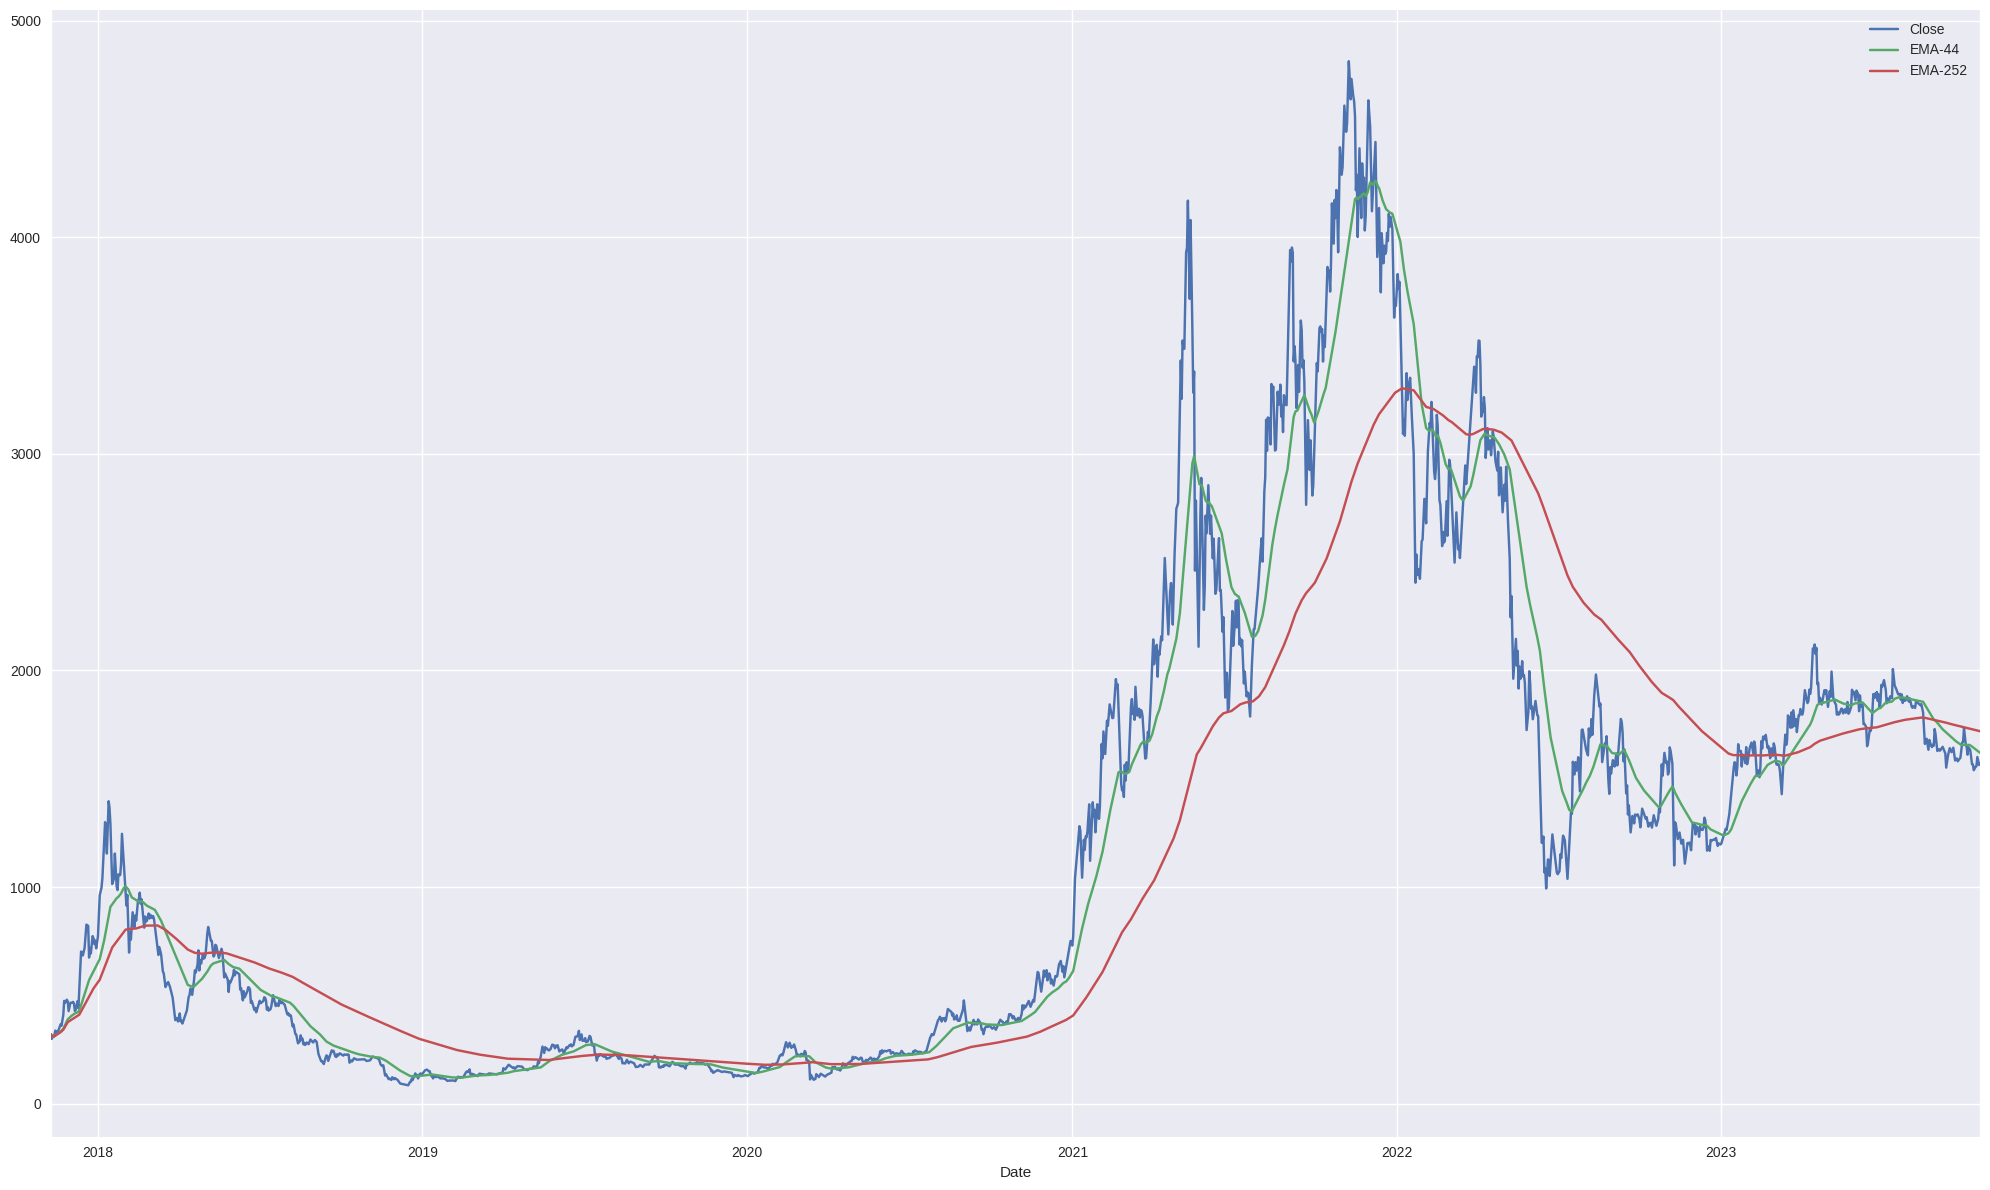

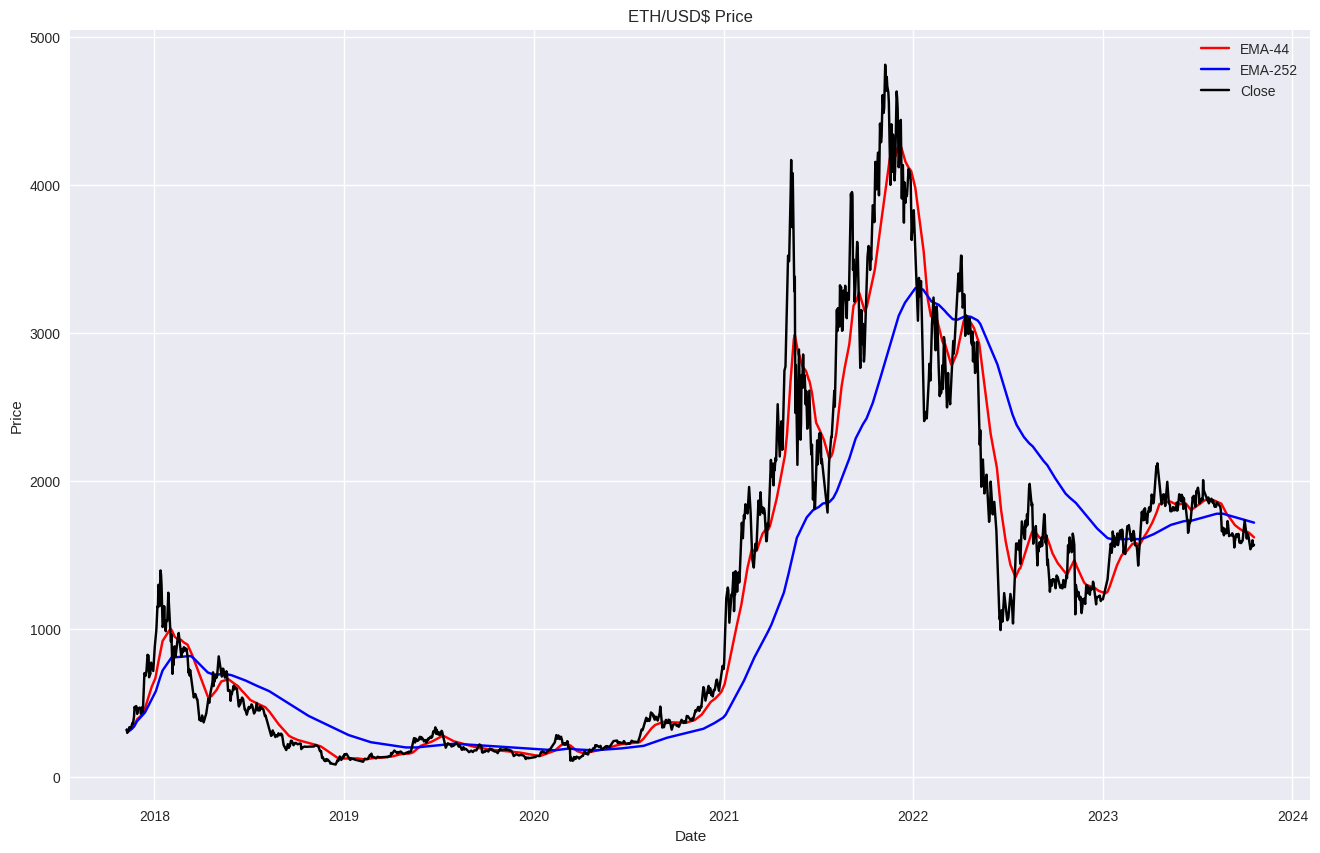

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [128]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family']

import yfinance as yf

eth = yf.Ticker("ETH-USD")
df_eth = yf.download(tickers="ETH-USD", period="max", interval="1d")

# Calculate EMAs (Exponential moving averages)
df_eth['EMA-44'] = df_eth['Close'].ewm(span=44).mean() # Calculates the values for the shorter EMA
df_eth['EMA-252'] = df_eth['Close'].ewm(span=252).mean() # Calculates the values for the longer EMA

# Drop unnecessary columns
df_eth_filtered = df_eth.drop(columns=['Open','High','Low','Adj Close','Volume'], axis=1)


import matplotlib.pyplot as plt

# Plot the filtered DataFrame
df_eth_filtered.plot( figsize=(20, 12))
plt.tight_layout()
# Show the plot
plt.show()

## Plot with Seaborn
import seaborn as sns

# Set the figure size
plt.figure(figsize=(16, 10))

# Plot the EMA lines
sns.lineplot(
    x="Date",
    y='EMA-44',
    data=df_eth_filtered,
    color='red',
    label='EMA-44'
)
sns.lineplot(
    x="Date",
    y='EMA-252',
    data=df_eth_filtered,
    color='blue',
    label='EMA-252'
)
sns.lineplot(
    x="Date",
    y='Close',
    data=df_eth_filtered,
    color='black',
    label='Close'
)
# Set the title and labels
plt.title("ETH/USD$ Price")
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.show()

## Plot with Plotly
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Line(
    x=df_eth_filtered.index,
    y=df_eth_filtered['EMA-44'],
    name='EMA-44',
    marker_color='red'
))
fig.add_trace(go.Line(
    x=df_eth_filtered.index,
    y=df_eth_filtered['EMA-252'],
    name='EMA-252',
    marker_color='blue'
))

# Plot the Close line
fig.add_trace(go.Line(
    x=df_eth_filtered.index,
    y=df_eth_filtered['Close'],
    name='Close',
    marker_color='black'
))

# Set the title and labels
fig.update_layout(
    title="ETH/USD$ Price",
    xaxis_title="Date",
    yaxis_title="Price"
)

# Set the figure size
fig.update_layout(
    width=1200,
    height=800
)

# Show the plot
fig.show()

# Generating trading signals with moving average crossover

 Here we want to implements a simple trading strategy based on the Exponential moving average (EMA) to generate trading signals. The strategy works as follows:

Two EMAs with time periods of 44 and 252 days are calculated.
If the 44-day EMA is above the 252-day EMA, a long position is opened.
If the 44-day EMA is below the 252-day EMA, a short position is opened.
Output:

A plot of ETH price and the "Position" column is created.

- Input variables:

df_eth: A DataFrame containing ETH price data

- Output variables:

df_eth_filtered: A DataFrame containing ETH price data and the "Position" column

### Generating trading signals
Once the moving averages have been calculated, we can use them to generate trading signals. The strategy works by looking for the point at which the 44-day EMA crosses above or below the 252-day EMA.

In this case, a value of 1 indicates a long position, and a value of -1 indicates a short position.



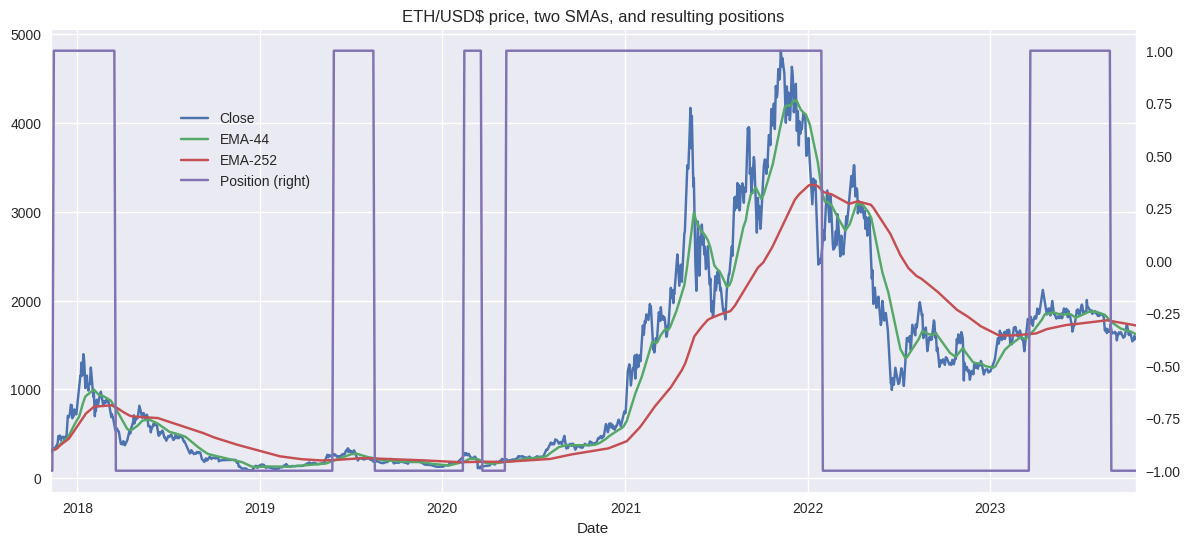

In [129]:
# Generate trading signals
df_eth_filtered['Position'] = np.where(df_eth_filtered['EMA-44'] > df_eth_filtered['EMA-252'], 1, -1)

import matplotlib.pyplot as plt

# Plot the results
fig, ax = plt.subplots(figsize=(14, 6))
df_eth_filtered.plot(ax=ax, secondary_y='Position')

# Set the title and labels
ax.set_title('ETH/USD$ price, two SMAs, and resulting positions')
ax.set_xlabel('Date')

# Adjust the legend position
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Show the plot
plt.show()

## Strategy Performance:
This Section analyzes the performance of an EMA-based trading strategy applied to ETH/USD prices. It calculates the daily logarithmic returns of the closing prices and uses a specified 'Position' value to generate strategy returns.

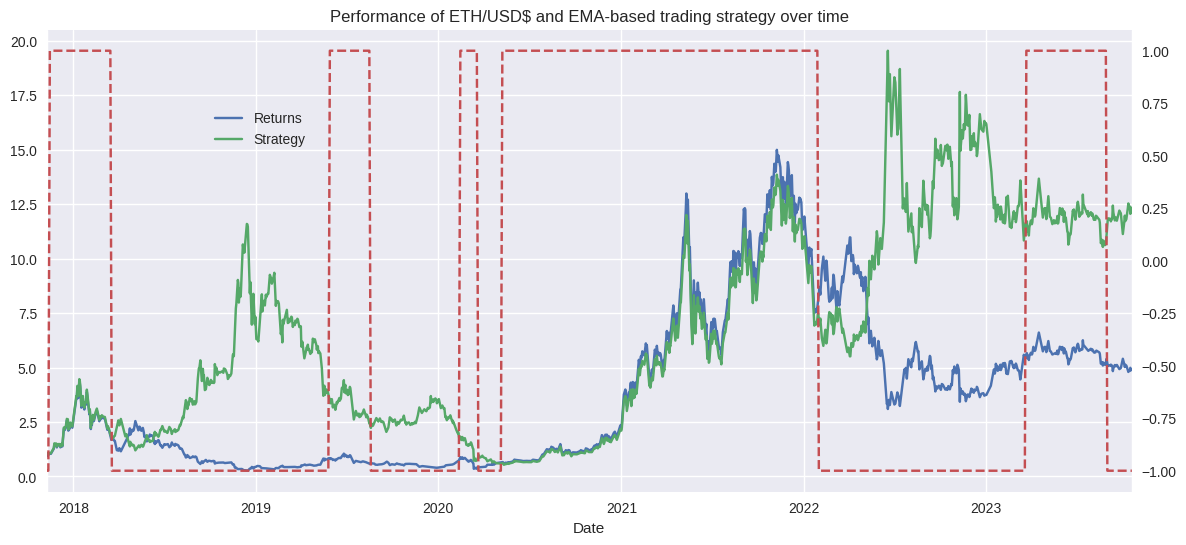

In [130]:
# Calculate the daily returns (returns of the price)
df_eth_filtered['Returns'] = np.log(df_eth_filtered['Close'] / df_eth_filtered['Close'].shift(1))

# Calculate the returns of the strategy
df_eth_filtered['Strategy'] = df_eth_filtered['Position'].shift(1) * df_eth_filtered['Returns']

# Calculate the total return of the strategy
np.exp(df_eth_filtered[['Returns', 'Strategy']].sum())

# Calculate the standard deviation of the strategy returns
df_eth_filtered[['Returns', 'Strategy']].std() * 252 ** 0.5

# Plot the cumulative returns of the strategy
ax = df_eth_filtered[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(14, 6))
df_eth_filtered['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax.set_title('Performance of ETH/USD$ and EMA-based trading strategy over time')
plt.show()

## Implementing two EMAs Crossover trading strategy Signals:
This code implements a trading strategy based on the comparison of two exponential moving averages (EMA-44 and EMA-252). It calculates the daily returns of ETH/USD prices and generates trading signals accordingly. The strategy returns and cumulative strategy returns are calculated and plotted. Additionally, the Sharpe Ratio is computed as a measure of risk-adjusted return.

in summary:

- This code defines two trading signals:
- Buy: EMA-44 > EMA-252
- Sell: EMA-44 < EMA
- calculates the daily returns of the ETH/USD price
- calculates the returns of the trading strategy
- calculates the cumulative returns of the trading strategy
- plot the cumulative returns of the trading strategy
- calculates the Sharpe Ratio of the trading strategy

The Sharpe Ratio is a measure of the risk-adjusted performance of an investment. It is calculated by dividing the average return of the investment by its standard deviation.

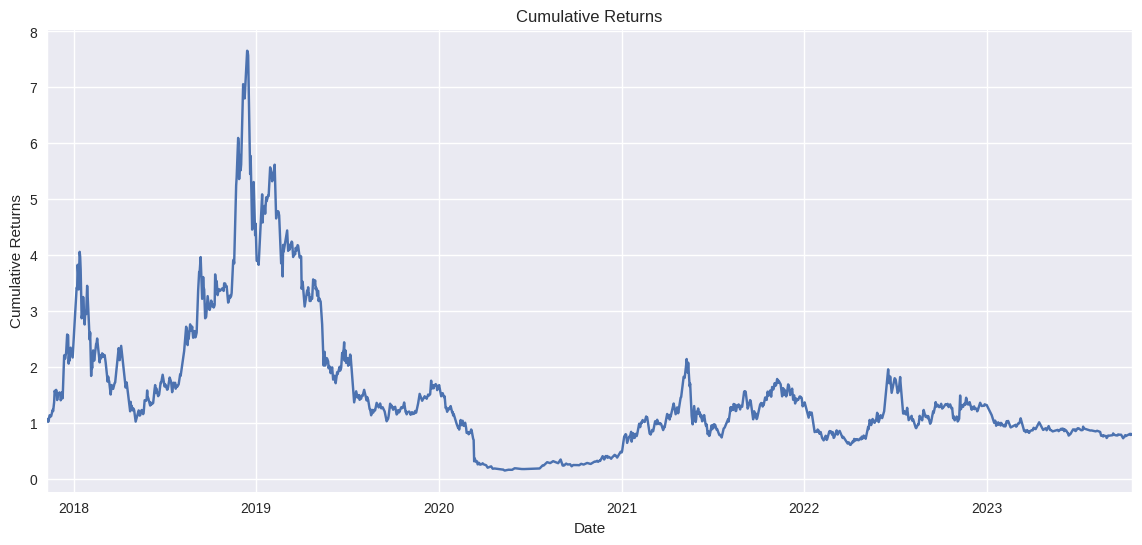

Sharpe Ratio: 0.36917810322771294


In [131]:
# Define trading signals
df_eth_filtered['Buy_Signal'] = (df_eth_filtered['EMA-44'] > df_eth_filtered['EMA-252'])
df_eth_filtered['Sell_Signal'] = (df_eth_filtered['EMA-44'] < df_eth_filtered['EMA-252'])

# Calculate returns (daily returns)
df_eth_filtered['Return'] = np.log(df_eth_filtered['Close'] / df_eth_filtered['Close'].shift(1))

# Calculate trading strategy returns
df_eth_filtered['Strategy_Return'] = df_eth_filtered['Return'] * df_eth_filtered['Buy_Signal'] - df_eth_filtered['Return'] * df_eth_filtered['Sell_Signal']

# Calculate cumulative returns of the trading strategy
df_eth_filtered['Cumulative_Strategy_Returns'] = (1 + df_eth_filtered['Strategy_Return']).cumprod()

# Plot cumulative returns of the trading strategy
import matplotlib.pyplot as plt

df_eth_filtered['Cumulative_Strategy_Returns'].plot(figsize=(14,6))
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Calculate Sharpe Ratio of the trading strategy
sharpe_ratio = df_eth_filtered['Strategy_Return'].mean() / df_eth_filtered['Strategy_Return'].std() * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio}')

In [132]:
df_eth_filtered

,Close,EMA-44,EMA-252,Position,Returns,Strategy,Buy_Signal,Sell_Signal,Return,Strategy_Return,Cumulative_Strategy_Returns
Date,,,,,,,,,,,
2017-11-09,320.884003,320.884003,320.884003,-1,NaN,NaN,False,False,NaN,NaN,NaN
2017-11-10,299.252991,309.822690,310.025578,-1,-0.069790,0.069790,False,True,-0.069790,0.069790,1.069790
2017-11-11,314.681000,311.516282,311.589717,-1,0.050270,-0.050270,False,True,0.050270,-0.050270,1.016012
2017-11-12,307.907990,310.551794,310.658299,-1,-0.021758,0.021758,False,True,-0.021758,0.021758,1.038119
2017-11-13,316.716003,311.899199,311.889147,1,0.028204,-0.028204,True,False,0.028204,0.028204,1.067398
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-15,1558.069824,1629.157322,1724.009306,-1,0.001807,-0.001807,False,True,0.001807,-0.001807,0.803613
2023-10-16,1600.534302,1627.885187,1723.033219,-1,0.026890,-0.026890,False,True,0.026890,-0.026890,0.782004
2023-10-17,1565.439575,1625.109827,1721.787419,-1,-0.022171,0.022171,False,True,-0.022171,0.022171,0.799342


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_eth_filtered, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_eth_filtered, *['EMA-44'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_eth_filtered, *['EMA-252'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_eth_filtered, *['Position'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_eth_filtered, *['Buy_Signal'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_eth_filtered, *['Sell_Signal'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_eth_filtered, *['Close', 'EMA-44'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_eth_filtered, *['EMA-44', 'EMA-252'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_eth_filtered, *['EMA-252', 'Position'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_eth_filtered, *['Position', 'Returns'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_eth_filtered, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_eth_filtered, *['EMA-44'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_eth_filtered, *['EMA-252'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_eth_filtered, *['Position'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_eth_filtered, *['Buy_Signal', 'Sell_Signal'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_eth_filtered, *['Close', 'Buy_Signal'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_eth_filtered, *['Close', 'Sell_Signal'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_eth_filtered, *['EMA-44', 'Buy_Signal'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_eth_filtered, *['EMA-44', 'Sell_Signal'], **{'inner': 'box'})
chart

Reference of Presenting New Solution Design Section:

Book Name: Python for Finance: Mastering Data-Driven Finance 2nd Edition

Publisher: O'Reilly Media, Inc.

Author: Yves Hilpisch

Chapter: 15

Pages: 484-489

https://www.oreilly.com/library/view/python-for-finance/9781492024323/